In [4]:
## %matplotlib inline  
import matplotlib.pyplot as plt
import csv
# Numpy
import numpy as np
from numpy import exp, log, minimum, sqrt
import math
# Scipy
from scipy import optimize
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import scipy

from os import listdir
from os.path import isfile, join
from astropy.io import fits
import galsim
from IPython.display import clear_output

from scipy.interpolate import griddata

from matplotlib import cm

from astropy.table import Table
from os import path
import os

from scipy.stats.stats import pearsonr   

from matplotlib.colors import LogNorm

from matplotlib.colors import SymLogNorm
from sklearn.decomposition import PCA

import matplotlib as mpl

import pickle


In [5]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

plt.rcParams["font.family"] = "Times New Roman"


In [6]:
catalog = pd.read_csv("data/total_df_new.csv",header = 0)
#catalog = pd.read_csv("data/total_df_9813_psfex.csv",header = 0)
#catalog = catalog[catalog['star_kurtosis']>0]
#catalog = catalog[catalog['iblendedness_abs_flux']<0.001]

In [6]:
catalog_old = pd.read_csv("data/total_df_9813_piff.csv",header = 0)

In [12]:
catalog = catalog[includedness==False]

In [8]:
old_id = np.array(catalog_old['id'])
new_id = np.array(catalog['id'])

In [9]:
print(new_id.shape, old_id.shape)

(7694,) (4432,)


In [10]:
old_set = set(old_id)
includedness = []
for i in range(len(new_id)):
    includedness.append(new_id[i] in old_set)
includedness = np.array(includedness)

In [11]:
np.sum(includedness)

60

In [4]:
psf_flux = catalog['slot_PsfFlux_instFlux']
psf_noise = catalog['slot_PsfFlux_instFluxErr']
snr = psf_flux/psf_noise

(array([1737., 1465., 1353., 1211., 1104., 1008.,  912.,  874.,  809.,
         705.,  654.,  606.,  518.,  461.,  406.,  324.,  258.,  226.,
         198.,  150.,  125.,  114.,   70.,   82.,   76.,   84.,   57.,
          81.,   80.,   73.,   65.,   46.,   59.,   51.,   52.,   48.,
          45.,   49.,   37.,   39.,   36.,   58.,   41.,   21.,   21.,
          15.,    7.,   11.,    4.,    2.]),
 array([1000.07831111, 1088.2317124 , 1176.38511368, 1264.53851497,
        1352.69191625, 1440.84531754, 1528.99871882, 1617.15212011,
        1705.30552139, 1793.45892268, 1881.61232396, 1969.76572525,
        2057.91912653, 2146.07252782, 2234.2259291 , 2322.37933039,
        2410.53273167, 2498.68613296, 2586.83953424, 2674.99293553,
        2763.14633681, 2851.2997381 , 2939.45313938, 3027.60654067,
        3115.75994195, 3203.91334324, 3292.06674452, 3380.22014581,
        3468.37354709, 3556.52694838, 3644.68034966, 3732.83375095,
        3820.98715223, 3909.14055352, 3997.2939548 , 408

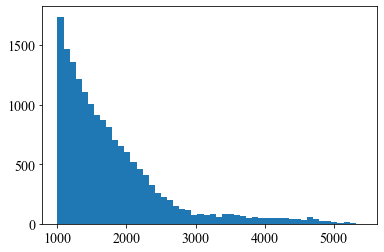

In [5]:
plt.hist(snr, bins = 50)

In [6]:
np.mean(snr)

1780.7117637691013

In [7]:
print(len(catalog))

16528


In [20]:
def viewmap(field_index, moment_index, t_min, t_max, r_max, filename = None):
    #field_index = 0

    single_size = xlim_field[field_index][1]- xlim_field[field_index][0],  ylim_field[field_index][1]- ylim_field[field_index][0]

    plt.figure(figsize = (6*single_size[0]+3, 2*single_size[1]))

    pq = pqlist[moment_index]


    plt.subplot(1,3,1)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

    plt.scatter(ra,dec,c=model_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Model Moment '+str(label_list[moment_index])+ ' Map')
    if moment_index<3:
        plt.title(r'PSF Model Moment '+second_moment_label[moment_index]+ ' Map')
    plt.colorbar()


    plt.subplot(1,3,2)

    plt.scatter(ra,dec,c=true_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Truth Moment '+str(label_list[moment_index])+ ' Map')
    if moment_index<3:
        plt.title(r'PSF Truth Moment '+second_moment_label[moment_index]+ ' Map')
    plt.colorbar()

    residue = (np.array(model_list[moment_index]) - np.array(true_list[moment_index]))

    plt.subplot(1,3,3)

    plt.scatter(ra,dec,c=residue,cmap = 'RdBu', s=0.3,vmin = -r_max, vmax = r_max)
    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Residual Moment {} Map'.format(label_list[moment_index]))
    if moment_index<3:
        plt.title(r'PSF Residual Moment '+second_moment_label[moment_index]+ ' Map')
    plt.colorbar()
    
    if filename !=None:
        plt.savefig(filename, dpi = 300)
        
    plt.show()

In [7]:
ra, dec = catalog['coord_ra']*180.0/np.pi, catalog['coord_dec']*180.0/np.pi

pqlist = [(0,2),(1,1),(2,0),(0,3),(1,2),(2,1),(3,0),(0,4),(1,3),(2,2),(3,1),(4,0),(0,5),(1,4),(2,3),(3,2),(4,1),(5,0),(0,6),(1,5),(2,4),(3,3),(4,2),(5,1),(6,0)]


true_list = []
model_list = []

for i in range(len(pqlist)):
    p,q = pqlist[i]
    true_list.append(catalog['truth_moment{}{}'.format(p,q)])
    model_list.append(catalog['model_moment{}{}'.format(p,q)])



In [8]:
## This is the reverse configuration

piff_residual_list = np.array(model_list) - np.array(true_list)


In [9]:

xlim_field = [[149.0,151.0], [215, 217.5], [336.5, 339]]
ylim_field = [[1.3,3.1], [-0.2,1.7], [-0.2,1.7] ]

field_name = ['one', 'two', 'three']




In [10]:
nob = 50
second_moment_label = ['$e_1$', '$\sigma$', '$e_2$']

label_list = []
for i in range(nob):
    if i < 25:
        i_pre = 't'
        
    else:
        i_pre = 'r'
        
    if i<3: 
        pq = second_moment_label[i]
    else:
        pq = pqlist[i%25]
    
    label1 = i_pre+str(pq[0])+str(pq[1])
    label_list.append(label1) 
    


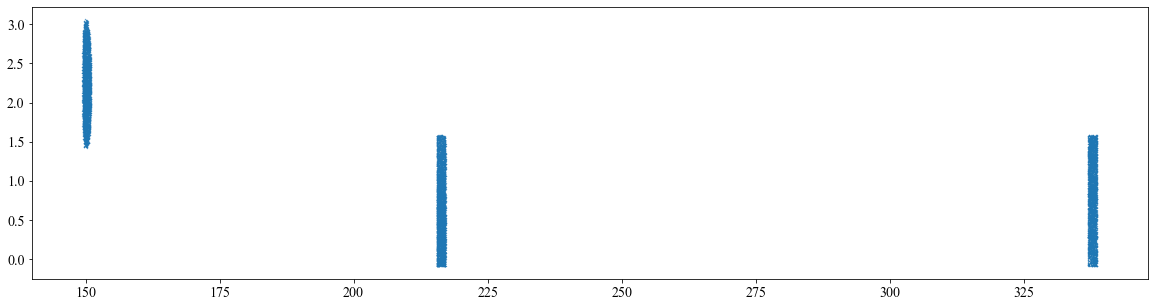

In [13]:
plt.figure(figsize = (20,5))
plt.scatter(ra,dec, s = 0.1 )
plt.show()

In [24]:
np.save( 'data/piff_residual_list.npy',piff_residual_list)


In [44]:
#piff_residual_list = np.load('data/piff_residual_list.npy')
#psfex_residual_list = np.load('data/psfex_residual_list.npy')

In [15]:
psfex_residual_list = np.load('data/psfex_residual_list.npy')

(-0.05000000000000001, 1.05, -0.05500000000000001, 0.05500000000000001)

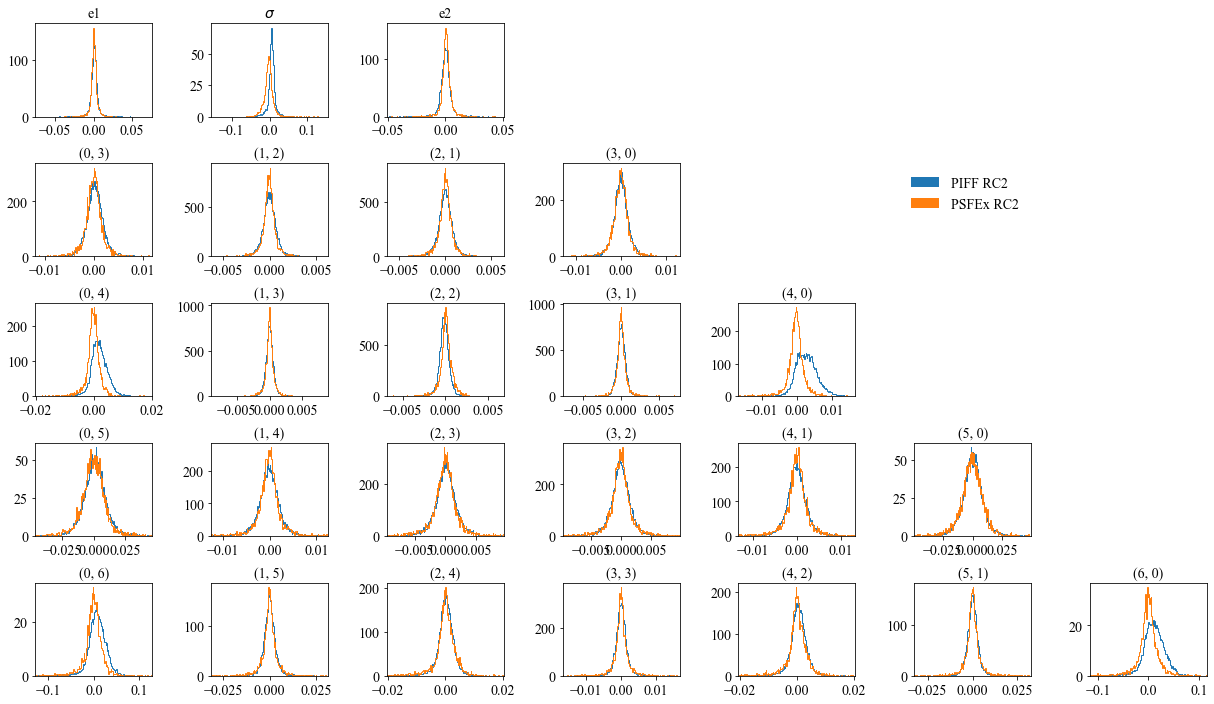

In [18]:
fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)


for j in range(25):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    ax = plt.subplot(5,7,1+7*(n-2)+p)
    
    std = np.std(piff_residual_list[j])

    plt.hist(piff_residual_list[j],bins = 200,range = (-3*std, 3*std), histtype = 'step', density = True )
    plt.hist(psfex_residual_list[j],bins = 200,range = (-3*std, 3*std), histtype = 'step', density = True)

    if j<3:
        plt.title(second_moment_label[j])
    else:
        plt.title(str((p,q)))
    plt.xlim([-3*std, +3*std])
    #plt.show()
    #plt.legend()
    
    
plt.subplot(5,7,13)
plt.hist([],label = r'PIFF RC2')
plt.hist([],label = r'PSFEx RC2')
# plt.plot([0],[0],label = r'exponential + constant*power')
# plt.plot([0],[0],label = r'power1 * arctan + power2')

plt.legend(frameon = False, fontsize = 14)     
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
    
#plt.savefig('figure/psfex_1d.pdf',dpi = 300)

In [145]:
import pickle

with open('data/params1.pkl', 'rb') as f:
    params1_dir = pickle.load(f)
with open('data/params2.pkl', 'rb') as f:
    params2_dir = pickle.load(f)

In [146]:
print(params1_dir)

{(0, 3): array([-5.07414934e-02,  3.22410592e-07,  1.21153971e-08]), (1, 2): array([-2.57416401e-02, -9.43577455e-08,  1.56297787e-10]), (2, 1): array([2.58069222e-02, 3.72194140e-07, 4.98867913e-09]), (3, 0): array([5.06541844e-02, 1.98657415e-07, 7.01838575e-09]), (0, 4): array([-1.37951454e+00, -2.47980142e-01,  3.62815350e-08]), (1, 3): array([-2.81145698e-01, -3.91339887e-03, -5.18875194e-09]), (2, 2): array([-5.65782191e-05,  5.76200521e-07, -3.23032383e-09]), (3, 1): array([ 2.80929964e-01, -3.91261702e-03,  4.27897823e-09]), (4, 0): array([ 1.37904010e+00,  2.47979980e-01, -1.87922109e-08]), (0, 5): array([-3.51729992e-02,  5.90720088e-06,  9.98480621e-09]), (1, 4): array([-6.06292292e-02,  1.00530849e-06,  6.35578105e-09]), (2, 3): array([-4.14585846e-04,  1.56906195e-06,  2.93249958e-08]), (3, 2): array([-9.00574549e-05,  7.11745025e-06,  1.27242602e-08]), (4, 1): array([6.05215520e-02, 7.36095781e-07, 6.61182037e-09]), (5, 0): array([ 3.53352300e-02, -1.88099596e-06, -7.0543

In [150]:
print(params2_dir)

{(0, 3): array([-2.39855812e-02,  1.60995605e-07,  1.35462661e-08]), (1, 2): array([-4.51477472e-02,  5.00859360e-07,  4.15456045e-12]), (2, 1): array([ 4.53213023e-02,  3.41931247e-07, -1.41850833e-09]), (3, 0): array([2.38232435e-02, 2.18833399e-07, 4.26953836e-09]), (0, 4): array([ 2.34954975e-02,  2.00331163e-03, -3.14445758e-09]), (1, 3): array([-6.48602350e-02,  3.76313839e-01, -3.34264181e-09]), (2, 2): array([-2.19273590e-05,  2.29471920e-07, -6.35236677e-09]), (3, 1): array([6.45680164e-02, 3.76310987e-01, 6.33540269e-09]), (4, 0): array([-2.35566780e-02, -2.00511922e-03, -1.18738439e-09]), (0, 5): array([6.13306376e-03, 3.11270771e-06, 1.87126797e-08]), (1, 4): array([-5.37674733e-03, -1.04417432e-07,  1.01211895e-08]), (2, 3): array([-2.67925216e-02,  1.77082904e-06,  3.77111987e-08]), (3, 2): array([2.62157369e-02, 3.37464719e-06, 1.10522747e-08]), (4, 1): array([5.41704921e-03, 7.36095664e-07, 9.99739867e-09]), (5, 0): array([-6.03131762e-03, -2.92009985e-06, -1.31945641e-

In [151]:
c1_tot = np.zeros(residual_list.shape)
c2_tot = np.zeros(residual_list.shape)

for i in range(3,25):
    this_pq = pqlist[i]
    this_param1 = params1_dir[(this_pq[0],this_pq[1])]
    this_param2 = params2_dir[this_pq]
    
    c1_tot[i] =  this_param1[2] + residual_list[i]*this_param1[1] + residual_list[i]**2*this_param1[0]
    c2_tot[i] =  this_param2[2] + residual_list[i]*this_param2[1] + residual_list[i]**2*this_param2[0]

In [152]:
print( np.mean(c1_tot,axis = 1))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.20090804e-07
 -2.92840645e-08  3.53858337e-08  3.35905013e-07 -3.72796152e-04
 -2.63714934e-07 -3.39520141e-09  2.94140991e-07  4.89754668e-04
 -6.63263247e-06 -6.94297622e-07  2.68999627e-08  1.04088977e-08
  7.65154856e-07  6.86683024e-06  3.27578971e-04 -1.81785648e-06
 -4.04051099e-05 -5.32766855e-07  2.24790718e-05  2.09969949e-06
 -6.05097822e-04]


In [105]:
data = np.concatenate((np.array(true_list), residual_list), axis = 0)

mean_residual_list = np.mean(data,axis = 1)
twentyfive = np.percentile(data, 25, axis = 1)
fifty = np.percentile(data, 50, axis = 1)
seventyfive = np.percentile(data, 75, axis = 1)




In [107]:
with open('data/psfex_stats.pkl','wb') as f:
    pickle.dump([mean_residual_list, twentyfive, fifty, seventyfive],f)

In [17]:
label_list[0:3] = second_moment_label

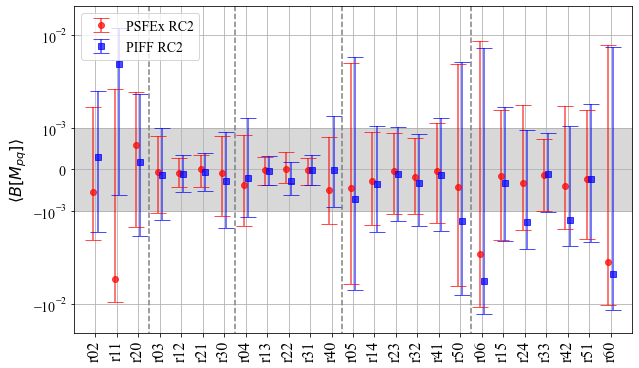

In [173]:
fig, ax = plt.subplots(1,1,figsize=(10, 6)) 

with open('data/psfex_stats.pkl','rb') as f:  # Python 3: open(..., 'rb')
    mean_residual_list, twentyfive, fifty, seventyfive  = pickle.load(f)

low_bar = mean_residual_list[25:] - twentyfive[25:]
high_bar = seventyfive[25:] - mean_residual_list[25:]
mappable = ax.errorbar(np.array(list(range(25)))-0.1, mean_residual_list[25:],yerr = [low_bar, high_bar], fmt = 'o', markersize=6, capsize=8, color = 'red',label = 'PSFEx RC2',alpha = 0.7 )


with open('data/piff_stats.pkl','rb') as f:  # Python 3: open(..., 'rb')
    mean_residual_list, twentyfive, fifty, seventyfive  = pickle.load(f)

low_bar = mean_residual_list[25:] - twentyfive[25:]
high_bar = seventyfive[25:] - mean_residual_list[25:]
mappable = ax.errorbar(np.array(list(range(25)))+0.1, mean_residual_list[25:],yerr = [low_bar, high_bar], fmt = 's', markersize=6, capsize=8, color = 'blue',label = 'PIFF RC2',alpha = 0.7 )


# with open('../plots2/pickle/moment_average.pkl','rb') as f:  # Python 3: open(..., 'rb')
#     psfex_mean_residual_list,_ ,_,psfex_twentyfive, psfex_seventyfive  = pickle.load(f)

# low_bar = psfex_mean_residual_list - psfex_twentyfive[25:]
# high_bar = psfex_seventyfive[25:] - psfex_mean_residual_list
# mappable = ax.errorbar(list(range(25)), psfex_mean_residual_list,yerr = [low_bar, high_bar], fmt = 'o', markersize=6, capsize=8, color = 'green',label = 'PSFEx PDR1',alpha = 0.7 )




ax.set_xticks(np.arange(0,25,1))
ax.set_xticklabels(label_list[25:], rotation='vertical', fontsize=16,)
ax.yaxis.label.set_size(16)



plt.xlim([-1,25])
plt.ylim([-0.02,0.02])
plt.yscale('symlog', linthresh = 0.001, linscale = 0.4)
plt.grid()
plt.ylabel(r"$\langle B[M_{pq}] \rangle$")
ax.fill_between(list(range(-2,27)), -0.001, 0.001, color = 'grey', alpha = 0.3)
#plt.title('Mean Higher Moment Residual')
plt.legend()

plt.plot([2.5,2.5], [-1,1], '--',color = 'grey')
plt.plot([6.5,6.5], [-1,1], '--',color = 'grey')
plt.plot([11.5,11.5], [-1,1], '--',color = 'grey')
plt.plot([17.5,17.5], [-1,1], '--',color = 'grey')





In [80]:
mean_residual_list = np.mean(residual_list,axis = 1)
print( mean_residual_list)

[ 4.40439587e-04  4.41764810e-03  1.85107923e-06 -5.23150267e-05
 -1.09323204e-04 -5.63632698e-05 -2.83669685e-04  2.13514613e-04
 -3.94950833e-05 -2.56062778e-04 -2.52828352e-05  6.38165730e-04
 -4.04543464e-04 -3.29872051e-04 -1.04530781e-04 -2.91764662e-04
 -1.90433521e-04 -1.08466152e-03 -3.30385130e-03 -3.44284950e-04
 -1.08296504e-03 -1.20195944e-04 -8.95364277e-04 -2.68385929e-04
 -1.34781385e-03]


In [27]:
pq_to_mean = dict()
for i in range(len(pqlist)):
    pq_to_mean[pqlist[i]] = mean_residual_list[i]
    

In [28]:
pq_order_simulation = [(0, 2),(1, 1),(2, 0),(0, 3),(1, 2),(2, 1),(3, 0),(0, 4),(1, 3),(2, 2),(3, 1),(4, 0),(0, 5),(1, 4),(2, 3),(3, 2),(4, 1),(5, 0),(0, 6),(1, 5),(2, 4),(3, 3),(4, 2),(5, 1),(6, 0)]

mean_for_simulation = []

for pq in pq_order_simulation:
    mean_for_simulation.append(pq_to_mean[pq])

np.save('../shapelet/data/mean_residual.npy', np.array(mean_for_simulation))





In [17]:
print(mean_for_simulation)

[-2.7210915195942924e-05, 0.0036947500105968764, 5.97435144443685e-05, 0.0003706455199224912, -8.561517507458113e-05, 0.00013692880875449518, -0.00024988827089172537, 0.001497367320122247, -1.7171106769026125e-06, -0.00018568337418628302, -6.405052410793572e-06, 0.001959133111581946, 0.0016905621757654435, -0.00023092935206198145, 0.00037289042378673126, -0.00023317371012388955, 0.00037943755922874723, -0.0011127091215667507, 0.004368520021689553, -2.2486807488255312e-05, -0.00028036735374720206, -1.175291976448932e-05, -0.00010386032480705674, -6.136422264892312e-05, 0.007121347173839072]


In [66]:
pq_to_error = dict()
for i in range(25):
    pq_to_error[pqlist[i]] = mean_residual_list[i]
new_order = []
for i in range(25):
    new_pq = pqlist[i]
    new_order.append(pq_to_error[(new_pq[1],new_pq[0])])
print new_order

[-2.7210915195942924e-05, 0.0036947500105968764, 5.97435144443685e-05, 0.00037256939545586386, -8.543114389611286e-05, 0.0001378658606396691, -0.0002516313348012394, 0.0014952706213846672, 1.8868190296566072e-08, -0.0001872069862827771, -5.932126227641839e-06, 0.001953801763521589, 0.0016915649752013977, -0.00022942603027643243, 0.0003737172574713498, -0.0002326016656519625, 0.0003793826434167092, -0.0011180377531281106, 0.004288821843255381, -6.378349604625537e-06, -0.0002903308605389229, -8.55422562327129e-06, -0.00011499552689537432, -4.514838792506807e-05, 0.007037653052025242]


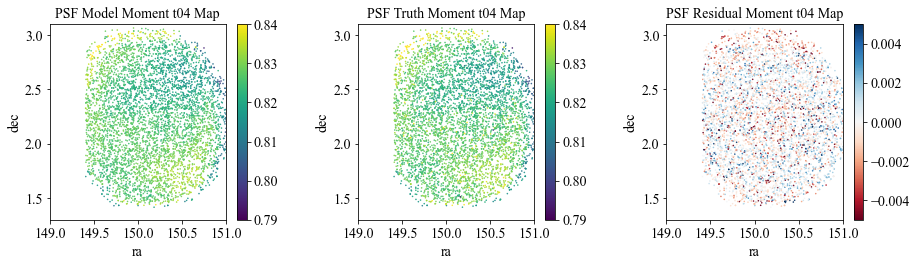

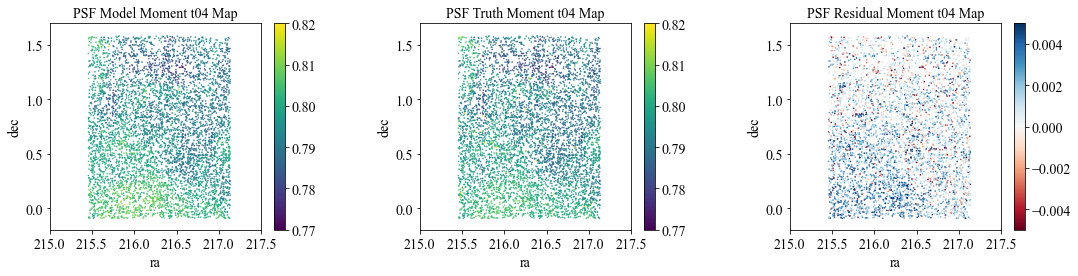

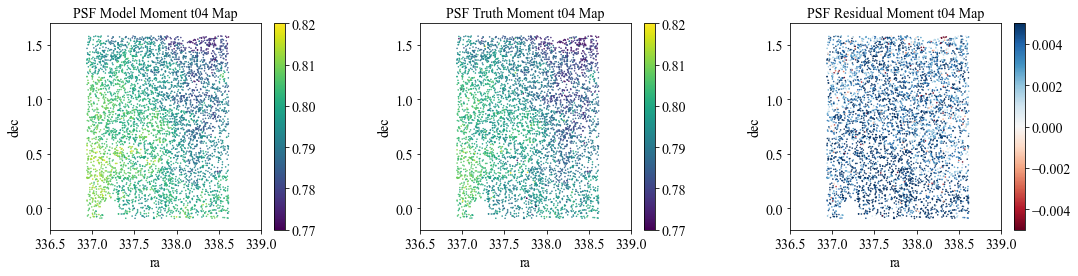

In [19]:
viewmap(0,7,0.79,0.84,0.005, filename = 'figure/piff_04_map.pdf')
viewmap(1,7,0.77,0.82,0.005, )
viewmap(2,7,0.77,0.82,0.005, )

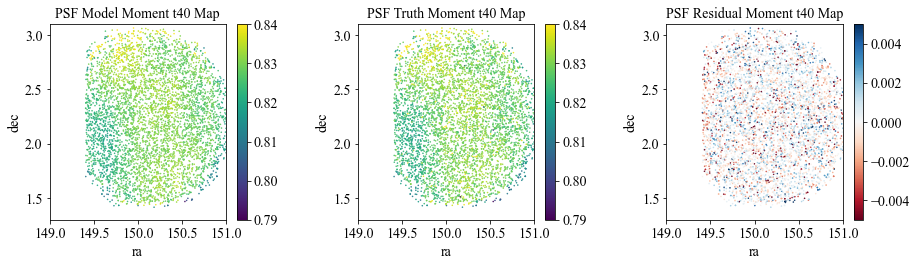

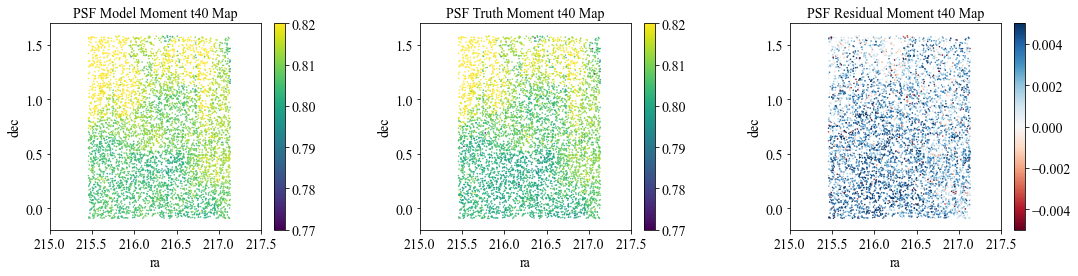

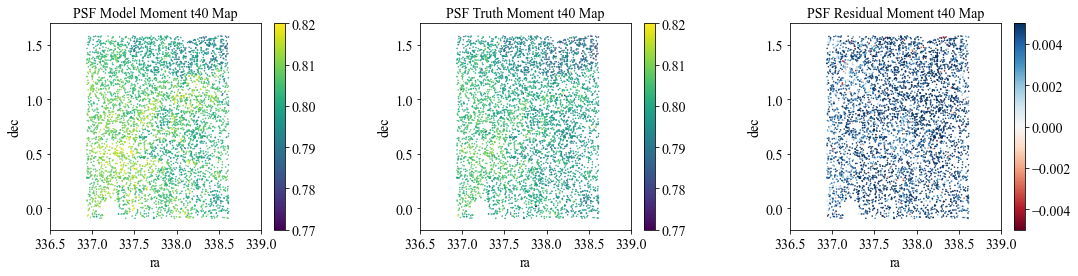

In [22]:
viewmap(0,11,0.79,0.84,0.005, filename = 'figure/piff_40_map.pdf')
viewmap(1,11,0.77,0.82,0.005, )
viewmap(2,11,0.77,0.82,0.005, )

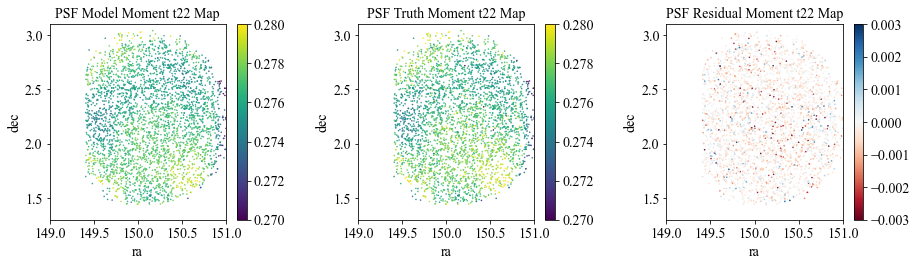

In [26]:
viewmap(0,9,0.27,0.28,0.003, filename = 'figure/piff_22_map.pdf')

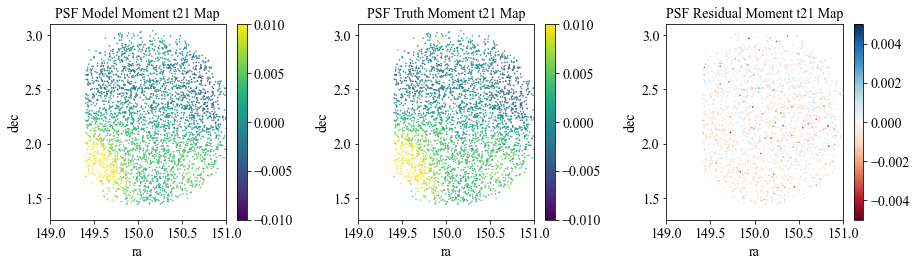

In [27]:
viewmap(0,5,-0.01,0.01,0.005,  filename = 'figure/piff_21_map.pdf')

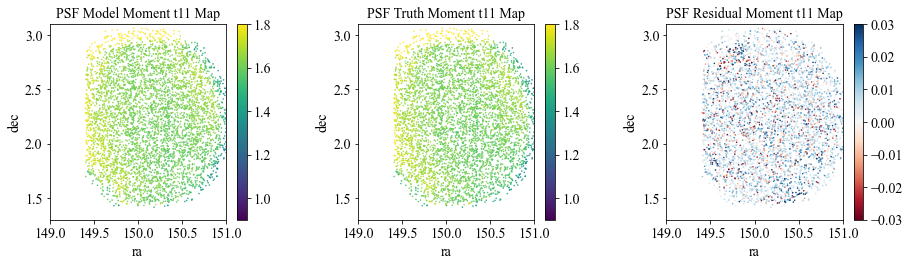

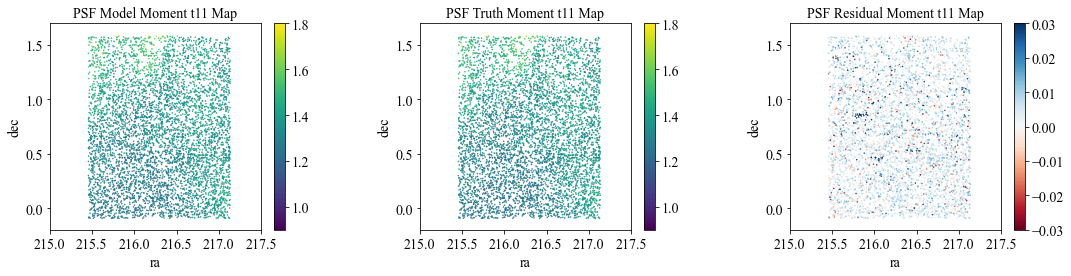

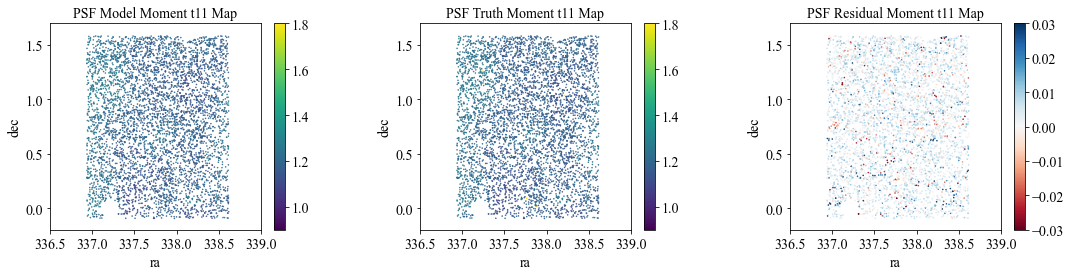

In [20]:
viewmap(0,1,0.9,1.8,0.03,  filename = 'figure/psfex_11_map.pdf')
viewmap(1,1,0.9,1.8,0.03, )
viewmap(2,1,0.9,1.8,0.03,  )

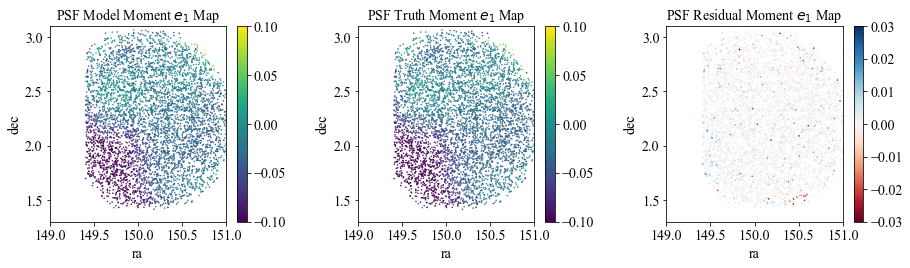

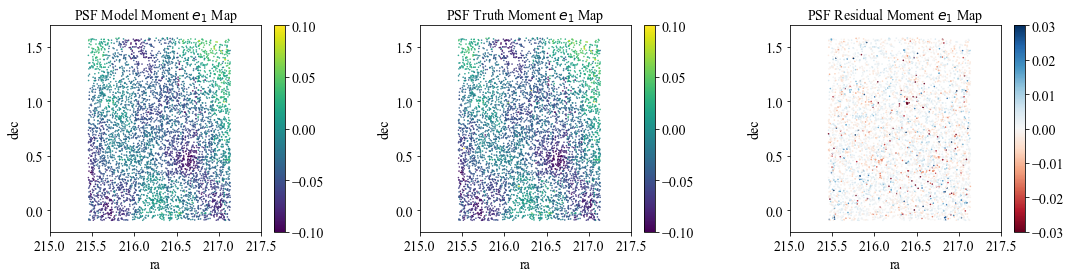

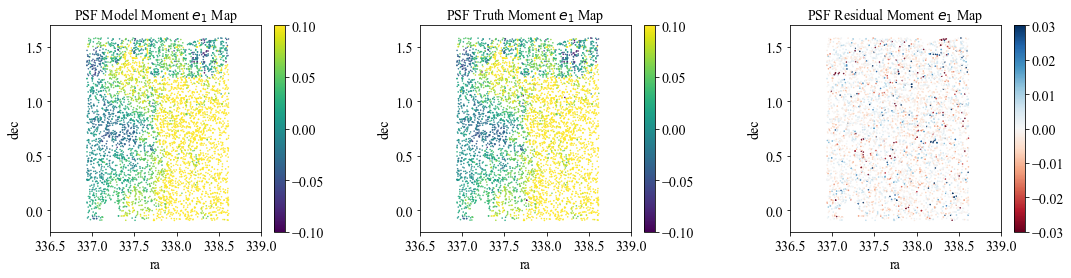

In [21]:
viewmap(0,0,-0.1,0.1,0.03,  filename = 'figure/psfex_11_map.pdf')
viewmap(1,0,-0.1,0.1,0.03, )
viewmap(2,0,-0.1,0.1,0.03,  )

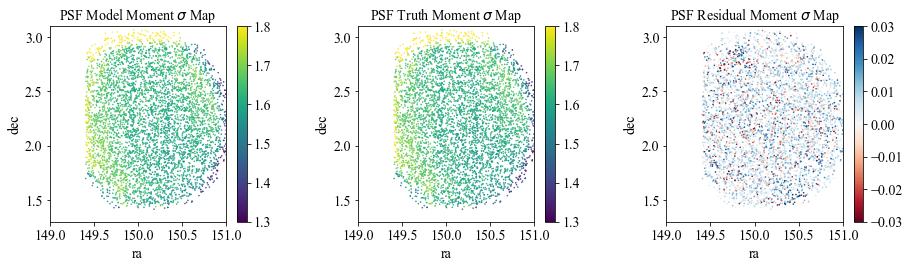

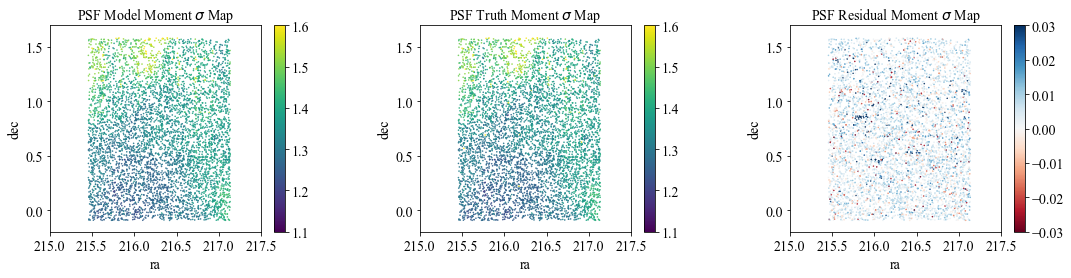

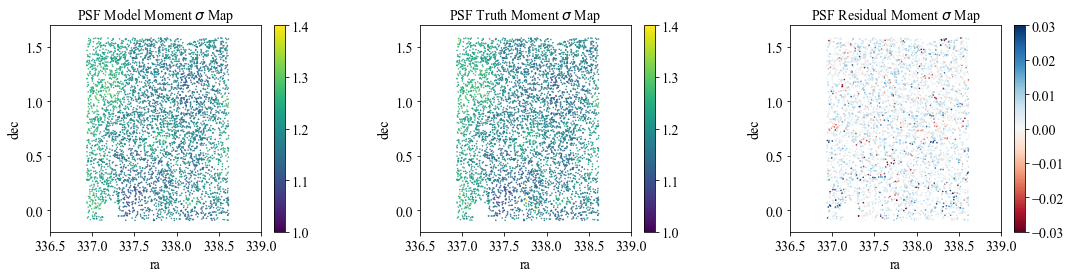

In [34]:
viewmap(0,1,1.3,1.8,0.03,  filename = 'figure/psfex_11_map.pdf')
viewmap(1,1,1.1,1.6,0.03, )
viewmap(2,1,1.0,1.4,0.03, )

In [13]:
def corr(l1, l2):
    return pearsonr(np.array(l1), np.array(l2))

In [16]:

correlation_matrix = np.zeros(shape = (50,50))
nob = 50
for i in range(nob):
    for j in range(i,nob):
        if i < 25:
            i_pre = 't'
            l1 = true_list[i]
        else:
            i_pre = 'r'
            l1 = np.array(model_list[i-25]) - np.array(true_list[i-25])
            
        if j < 25:
            j_pre = 't'
            l2 = true_list[j]
        else:
            j_pre = 'r'
            l2 = np.array(model_list[j-25]) - np.array(true_list[j-25])
        
        this_correlation = corr(l1,l2)[0]
        
        correlation_matrix[i][j] = this_correlation
        correlation_matrix[j][i] = this_correlation

In [52]:
nob = 50

label_list = []
for i in range(nob):
    if i < 25:
        i_pre = 't'
        
    else:
        i_pre = 'r'
        
    
    label1 = i_pre+str(pqlist[i%25][0])+str(pqlist[i%25][1])
    label_list.append(label1) 

In [17]:
import pickle
with open('../plots2/pickle/full_correlation_piff.pkl','wb') as f:
    pickle.dump([correlation_matrix, label_list],f)

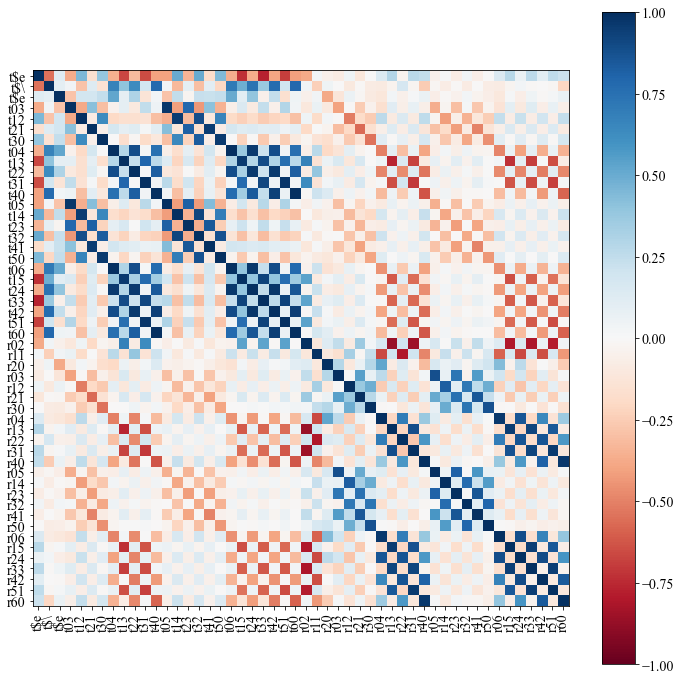

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12, 12)) 
mappable = ax.imshow(correlation_matrix, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,50,1))
ax.set_yticks(np.arange(0,50,1))

ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)
ax.set_yticklabels(label_list, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)

In [37]:
residual_04 = residual_list[7]
residual_06 = residual_list[18]

plt.scatter(residual_04, )

In [46]:
reduced_index = [7,11,18,20,22,24,8,10,19,21,23]
reduced_covariance = np.zeros(shape = (11,11))
reduced_label = []
nob = 11
for i in range(nob):
    reduced_label.append(label_list[reduced_index[i]])
    
    for j in range(i,nob):

        r1 = np.array(model_list[reduced_index[i]]) - np.array(true_list[reduced_index[i]])
        r1_shift = r1 - np.mean(r1)

        r2 = np.array(model_list[reduced_index[j]]) - np.array(true_list[reduced_index[j]])
        r2_shift = r2 - np.mean(r2)
        this_correlation = corr(r1_shift,r2_shift)[0]
        
        reduced_covariance[i][j] = this_correlation
        reduced_covariance[j][i] = this_correlation

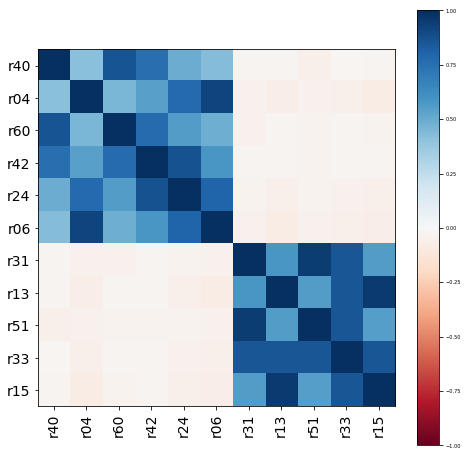

In [39]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.imshow(reduced_covariance, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,11,1))

ax.set_xticklabels(reduced_label, rotation='vertical', fontsize=14)
ax.set_yticklabels(reduced_label, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)

In [48]:
reduced_index = [0,1,2,7,11,18,20,22,24,8,10,19,21,23]
reduced_covariance = np.zeros(shape = (14,14))
reduced_label = []
nob = 14
for i in range(nob):
    reduced_label.append(label_list[reduced_index[i]])
    
    for j in range(i,nob):

        r1 = np.array(model_list[reduced_index[i]]) - np.array(true_list[reduced_index[i]])
        r1_shift = r1 - np.mean(r1)

        r2 = np.array(model_list[reduced_index[j]]) - np.array(true_list[reduced_index[j]])
        r2_shift = r2 - np.mean(r2)
        this_correlation = corr(r1_shift,r2_shift)[0]
        
        reduced_covariance[i][j] = this_correlation
        reduced_covariance[j][i] = this_correlation

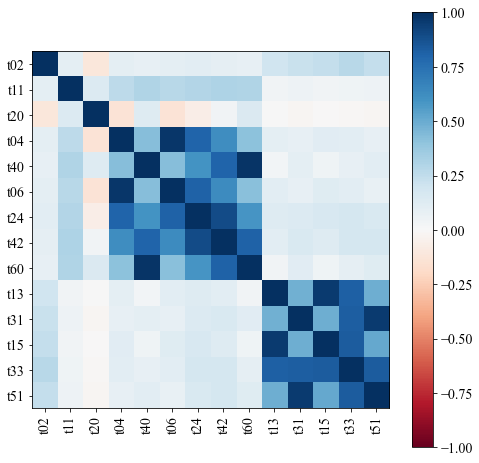

In [49]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.imshow(reduced_covariance, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,14,1))
ax.set_yticks(np.arange(0,14,1))

ax.set_xticklabels(reduced_label, rotation='vertical', fontsize=14)
ax.set_yticklabels(reduced_label, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)